/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


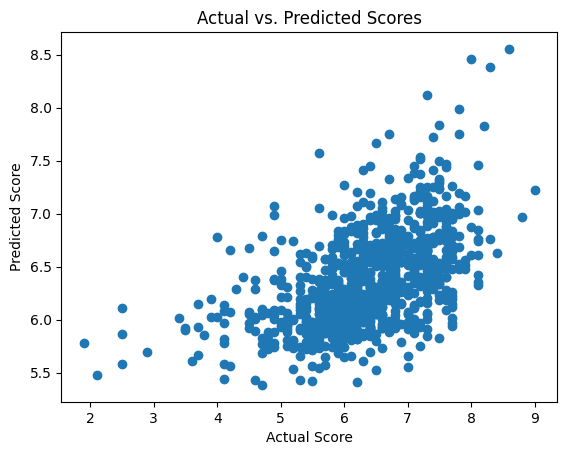

Mean Squared Error: 0.64
R-squared: 0.28


<ipython-input-22-eac79714c247>:72: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y, hist=False, color="r", label="Actual")
<ipython-input-22-eac79714c247>:73: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)


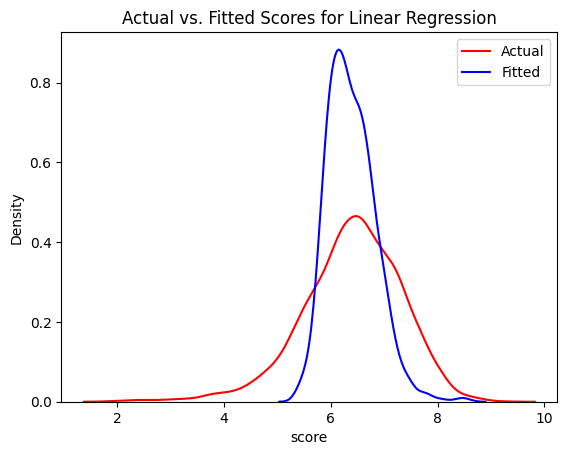

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import seaborn as sns


# Load the data
data =  pd.read_csv('imdb_data2.csv')
data = data.drop_duplicates(subset=['title'], keep='first').reset_index()

# Define the features and target variable
X = data.drop(['score', 'index'], axis=1)
y = data['score']

# Encode categorical variables using one-hot encoding
cat_cols = ['genre', 'rating', 'star', 'movie_star_rating']
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = enc.fit_transform(X[cat_cols])
X_cat_names = enc.get_feature_names_out(cat_cols)
X_cat_df = pd.DataFrame(X_cat, columns=X_cat_names)

# Combine one-hot encoded features with numeric features
num_cols = ['budget', 'star_net_worth', 'runtime']
X_num = X[num_cols].fillna(0)
X_all = pd.concat([X_num, X_cat_df], axis=1)

# Normalize the numeric features
scaler = StandardScaler()
X_all[num_cols] = scaler.fit_transform(X_all[num_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Set up hyperparameter search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train a linear regression model with Ridge regularization and hyperparameter tuning
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
ridge = Ridge(alpha=best_params['alpha'])
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the actual vs. predicted scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Scores')
plt.show()

# Print the evaluation metrics
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Plot the distribution of actual and predicted scores
ax=sns.distplot(y, hist=False, color="r", label="Actual")
sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)
plt.title('Actual vs. Fitted Scores for Linear Regression')
plt.legend()
plt.show()


Index(['Unnamed: 0', 'title', 'rating', 'genre', 'score', 'star', 'budget',
       'runtime', 'star_net_worth', 'movie_star_rating'],
      dtype='object')


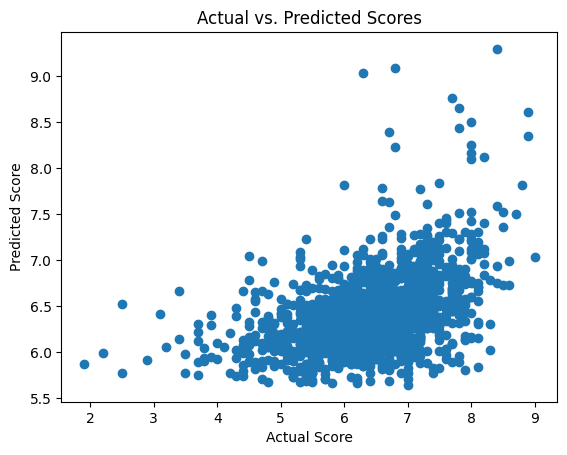

Mean Squared Error: 0.72
R-squared: 0.20


<ipython-input-26-255f875b6347>:91: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y, hist=False, color="r", label="Actual")
<ipython-input-26-255f875b6347>:92: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)


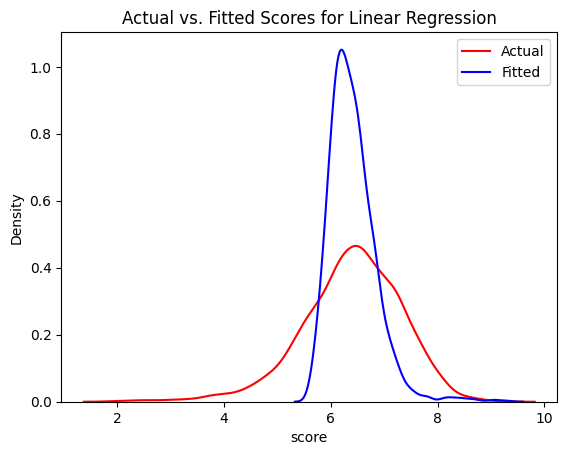

In [26]:
movies_df= pd.read_csv("imdb_data2.csv")
print(movies_df.columns)
X = movies_df.drop(['Unnamed: 0','score', 'star', 'star_net_worth', 'title'], axis=1)
y = movies_df['score']

ratings = [
    (X['rating'] == 'R'),
    (X['rating'] == 'PG-13'),
    (X['rating'] == 'PG'),
    (X['rating'] == 'G'),
    (X['rating'] == 'Not Rated'),
    (X['rating'] == 'Unrated'),
    (X['rating'] == 'NC-17'),
    (X['rating'] == 'TV-MA'),
    (X['rating'] == 'Approved'),
    (X['rating'] == 'X'),
    ]

values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

X['ratingId'] = np.select(ratings, values)


genres = [
    (X['genre'] == 'Comedy'),
    (X['genre'] == 'Action'),
    (X['genre'] == 'Drama'),
    (X['genre'] == 'Crime'),
    (X['genre'] == 'Adventure'),
    (X['genre'] == 'Biography'),
    (X['genre'] == 'Animation'),
    (X['genre'] == 'Horror'),
    (X['genre'] == 'Fantasy'),
    (X['genre'] == 'Mystery'),
    (X['genre'] == 'Sci-Fi'),
    (X['genre'] == 'Romance'),
    (X['genre'] == 'Thriller'),
    (X['genre'] == 'Family'),
    (X['genre'] == 'Western'),
    ]

values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

X['genreId'] = np.select(genres, values)

celebrity_ratings = [
    (X['movie_star_rating'] == 'A'),
    (X['movie_star_rating'] == 'B'),
    (X['movie_star_rating'] == 'C'),
    (X['movie_star_rating'] == 'D')
]

values = ['4','3','2','1']
X['movieStarId'] = np.select(celebrity_ratings, values)

X = X.drop(['rating', 'genre', 'movie_star_rating'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set up hyperparameter search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train a linear regression model with Ridge regularization and hyperparameter tuning
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
ridge = Ridge(alpha=best_params['alpha'])
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the actual vs. predicted scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Scores')
plt.show()

# Print the evaluation metrics
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Plot the distribution of actual and predicted scores
ax=sns.distplot(y, hist=False, color="r", label="Actual")
sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)
plt.title('Actual vs. Fitted Scores for Linear Regression')
plt.legend()
plt.show()

In [45]:
prediction_df = pd.DataFrame(columns=['budget', 'runtime', 'ratingId', 'genreId', 'movieStarId'])
prediction_df.loc[0] = ['73000000','118','3', '2', '1']
print(y_pred)

[6.44117305]


In [12]:
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.6 degrees.
Accuracy: 89.42 %.
